In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
#import warnings
import warnings
#filter warnings 
warnings.filterwarnings('ignore')

In [ ]:
!ls

sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(2290, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(2294, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#put labels into y_train variable
Y_train = train["label"]
#Drop 'label' column
X_train = train.drop(labels = ["label"],axis=1)

1    260
2    260
6    240
4    235
0    229
9    226
7    218
8    216
5    215
3    191
Name: label, dtype: int64

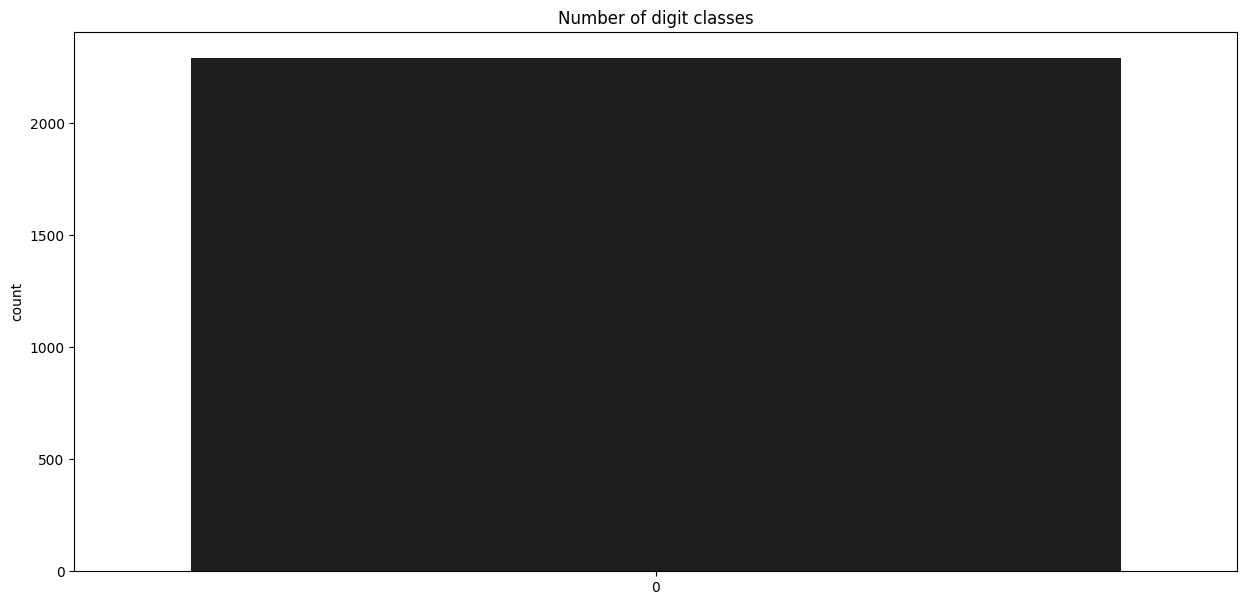

In [ ]:
#visualize number of digits classes
plt.figure(figsize=(15,7))
g =sns.countplot(data=Y_train,palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

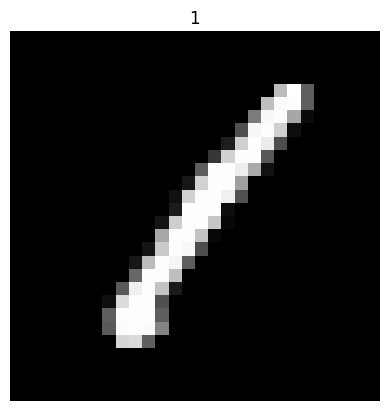

In [ ]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

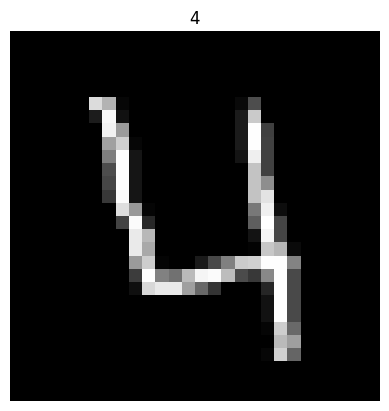

In [ ]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0 
print("x_train shape:" ,X_train.shape)
print("test shape: ",test.shape)

x_train shape: (2290, 784)
test shape:  (2294, 784)


In [ ]:
X_train = X_train.values.reshape(-1,28,28,1) # -1 bilinmeyen
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (2290, 28, 28, 1)
test shape:  (2294, 28, 28, 1)


In [ ]:
#Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
#Split the train and the validation set for the fitting

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)

print("x_test shape",X_val.shape)

print("y_train shape",Y_train.shape)

print("y_test shape",Y_val.shape)

  

x_train shape (1854, 28, 28, 1)
x_test shape (207, 28, 28, 1)
y_train shape (1854, 10)
y_test shape (207, 10)


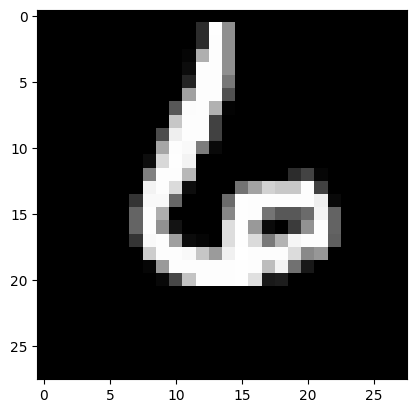

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [ ]:
#
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.optimizers import RMSprop,Adam

from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau

 

model = Sequential()
#

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add (MaxPool2D(pool_size=(2,2)))

model.add(Dropout (0.25))

#

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add (Dropout (0.25))

# fully connected .

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add (Dropout (0.5))
model.add(Dense(10, activation = 'softmax'))

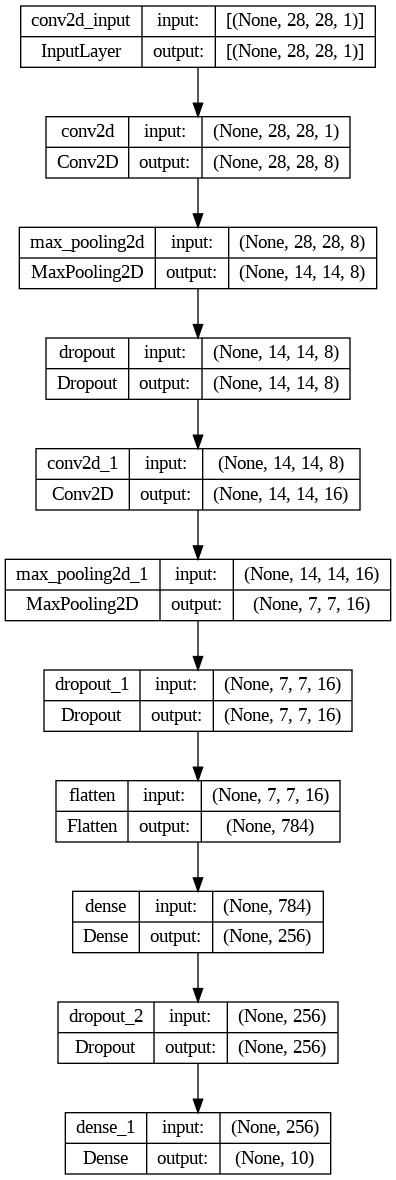

In [ ]:
# Plot Model

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
#Compile the model
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics=["accuracy"])

In [ ]:
epochs = 10 #for better result increase the epochs
batch_size = 250

In [ ]:
# data augmentation

datagen = ImageDataGenerator(
featurewise_center=False, # set input mean to 0 over the dataset
samplewise_center=False, # set each sample mean to 0
featurewise_std_normalization=False, # divide inputs by std of the dataset
samplewise_std_normalization=False, # divide each input by its std
zca_whitening=False, # dimesion reduction
rotation_range=5, # randomly rotate images in the range 5 degrees
zoom_range = 0.1, # Randomly zoom image 10%
width_shift_range=0.1, # randomly shift images horizontally 10%
height_shift_range=0.1, # randomly shift images vertically 10%
horizontal_flip=False, # randomly flip images
vertical_flip=False) # randomly flip images

 

datagen.fit(X_train)

In [ ]:
# Fit the model

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
7/7 [==============================] - 4s 401ms/step - loss: 2.2755 - accuracy: 0.1434 - val_loss: 2.1720 - val_accuracy: 0.3671
Epoch 2/10
7/7 [==============================] - 2s 207ms/step - loss: 2.1603 - accuracy: 0.2232 - val_loss: 1.9647 - val_accuracy: 0.5942
Epoch 3/10
7/7 [==============================] - 1s 201ms/step - loss: 1.9631 - accuracy: 0.3479 - val_loss: 1.6165 - val_accuracy: 0.6087
Epoch 4/10
7/7 [==============================] - 2s 205ms/step - loss: 1.7728 - accuracy: 0.4015 - val_loss: 1.2231 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 1s 202ms/step - loss: 1.5905 - accuracy: 0.4688 - val_loss: 1.0062 - val_accuracy: 0.7246
Epoch 6/10
7/7 [==============================] - 2s 347ms/step - loss: 1.5103 - accuracy: 0.4695 - val_loss: 0.8858 - val_accuracy: 0.7585
Epoch 7/10
7/7 [==============================] - 3s 397ms/step - loss: 1.3527 - accuracy: 0.5611 - val_loss: 0.8264 - val_accuracy: 0.7778
Epoch 8/10
7/7 [====

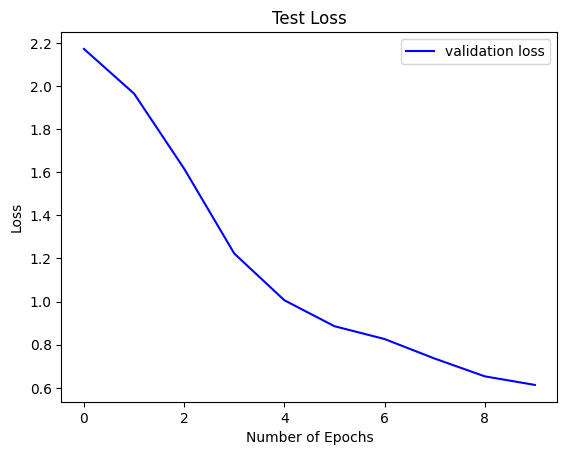

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")

plt.xlabel("Number of Epochs")

plt.ylabel("Loss")

plt.legend()

plt.show()

7/7 [==============================] - 0s 20ms/step


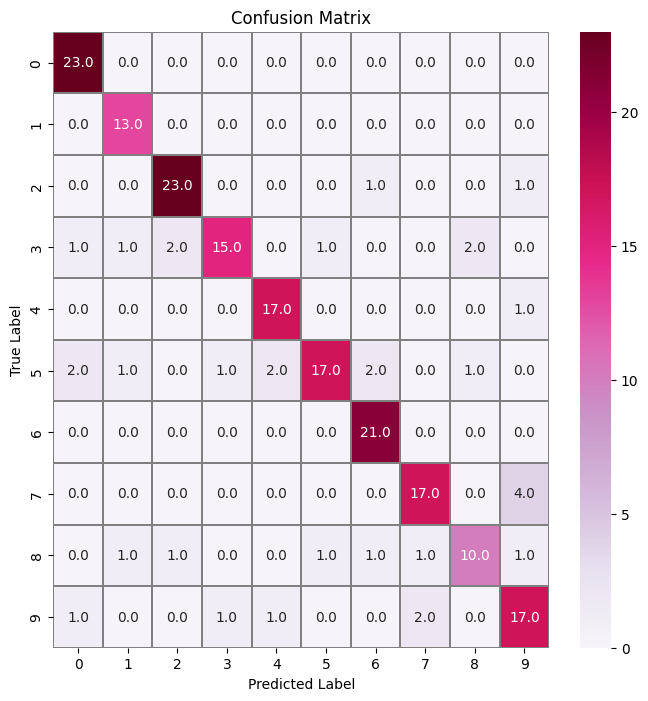

In [ ]:
# confusion matrix
import seaborn as sns

# Predict the values from the validation dataset

Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors

Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors

Y_true = np.argmax(Y_val,axis = 1)

# conpute the confusion matrix

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix

f,ax = plt.subplots(figsize=(8, 8))

sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="PuRd", linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix")

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_pred, axis=1), Y_true))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       1.00      0.81      0.90        16
           2       0.92      0.88      0.90        26
           3       0.68      0.88      0.77        17
           4       0.94      0.85      0.89        20
           5       0.65      0.89      0.76        19
           6       1.00      0.84      0.91        25
           7       0.81      0.85      0.83        20
           8       0.62      0.77      0.69        13
           9       0.77      0.71      0.74        24

    accuracy                           0.84       207
   macro avg       0.84      0.83      0.83       207
weighted avg       0.86      0.84      0.84       207

